
*   ohlcv 불러오기 
*   pandas_series.rolling
*   LSTM



패키지 설치

In [1]:
!pip install pykrx

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 256kB 35.8MB/s 


In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 13.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=1131f5392b648b966c203fb73c174019f24062064ddb546e717e42946922a606
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
!pip install pandas-datareader

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance
import pykrx
import matplotlib.pyplot as plt

## 주식 시세 데이터 불러오기(yahoo finance)

In [ ]:
df_ss = pdr.get_data_yahoo('005930.KS','20200101','20200131')
df_apple = pdr.get_data_yahoo('AAPL','20200101','20200131')

In [ ]:
df_ss.head() #OHLCV

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000,55000,55500,55200,12993228,52537.179688
2020-01-03,56600,54900,56000,55500,15422255,52822.707031
2020-01-06,55600,54600,54900,55500,10278951,52822.707031
2020-01-07,56400,55600,55700,55800,10009778,53108.238281
2020-01-08,57400,55900,56200,56800,23501171,54059.992188


In [ ]:
df_apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400,74.207466
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800,73.486023
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200,74.071579
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000,73.723213
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200,74.909149


In [ ]:
for df in [df_ss, df_apple]:
  df.drop("Adj Close", axis=1, inplace= True)

In [ ]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2020-01-02 to 2020-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   High    20 non-null     int64
 1   Low     20 non-null     int64
 2   Open    20 non-null     int64
 3   Close   20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


In [ ]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-01-02 to 2020-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    21 non-null     float64
 1   Low     21 non-null     float64
 2   Open    21 non-null     float64
 3   Close   21 non-null     float64
 4   Volume  21 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


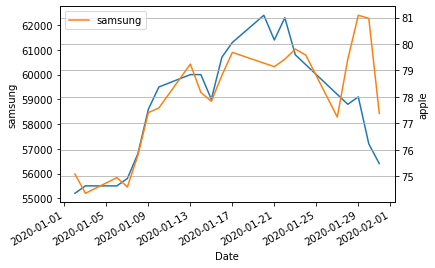

In [ ]:
ax =df_ss['Close'].plot()
ax1 = df_apple['Close'].plot(secondary_y= True)
ax.set_ylabel("samsung")
ax1.set_ylabel("apple")
plt.legend(labels = ["samsung","apple"])
plt.grid()
plt.show()


## 일간변동률 지수화(indexing)
* 가격이 다른 두 주식의 가격을 특정일자를 기준으로 비율로 나눈 것
* 오늘-1970/1970

### 차분(변동)

In [ ]:
for df in [df_ss, df_apple]:
  df['전일종가'] = df["Close"].shift() #1주: 5일
  df["전일기준변동(차분)"]  = df["Close"]- df["Close"].shift()
  df["일간변동률"] = (df["Close"]-df["Close"].shift()) / df["Close"].shift()*100

In [ ]:
df_apple.head()

,High,Low,Open,Close,Volume,전일종가,전일기준변동(차분),일간변동률
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800,75.087502,-0.730003,-0.972204
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200,74.357498,0.592499,0.796825
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000,74.949997,-0.352493,-0.470305
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200,74.597504,1.199997,1.608629


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


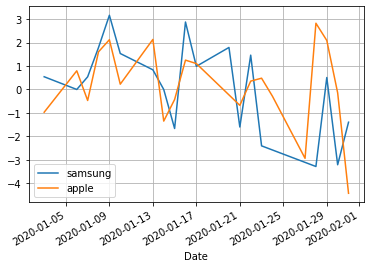

In [ ]:
ax =df_ss['일간변동률'].plot()
ax1 = df_apple['일간변동률'].plot()
plt.legend(labels = ["samsung","apple"])
plt.grid()
plt.show()


## pykrx API

In [ ]:
from pykrx import stock as krx

df_ss = krx.get_market_ohlcv_by_date('20190101','20210101','005930')
df_lg = krx.get_market_ohlcv_by_date('20190101','20210101','066570')

for df in [df_ss, df_lg]:
  # df['전일종가'] = df["종가"].shift() #1주: 5일
  # df["전일기준변동(차분)"]  = df["종가"]- df["종가"].shift()
  df["일간변동률"] = (df["종가"]-df["종가"].shift()) / df["종가"].shift()*100

#### 결측값 채우기

In [ ]:
# df_lg.fillna(0, inplace=True, axis=1)
for df in [df_ss,df_lg]:
  df.fillna(method = 'ffill', inplace=True) #ffill:직전 값, bfill:직후 값

In [ ]:
df_ss.head()

,시가,고가,저가,종가,거래량,일간변동률
날짜,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,-2.967742
2019-01-03,38300,38550,37450,37600,12471493,-2.967742
2019-01-04,37450,37600,36850,37450,14108958,-0.398936
2019-01-07,38000,38900,37800,38750,12748997,3.471295
2019-01-08,38000,39200,37950,38100,12756554,-1.677419


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


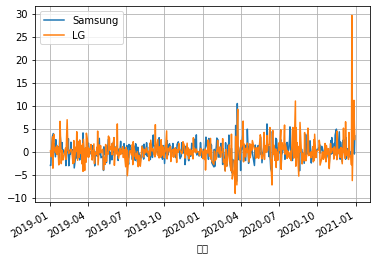

In [ ]:
ax =df_ss['일간변동률'].plot()
ax1 = df_lg['일간변동률'].plot()
plt.legend(labels = ["Samsung","LG"])
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


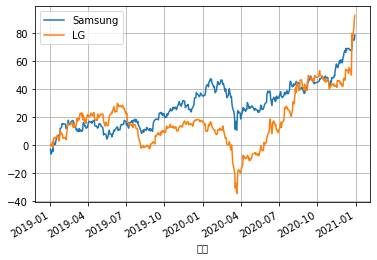

In [ ]:
# cumsum(): 누적합 구하기
ax =df_ss['일간변동률'].cumsum().plot()
ax1 = df_lg['일간변동률'].cumsum().plot()
plt.legend(labels = ["Samsung","LG"])
plt.grid()
plt.show()

#### pandas.rolling

In [ ]:
print(df_ss.shape,df_lg.shape)

(494, 6) (494, 6)


In [ ]:
window_size= 250 #1년 단위로 묶는다
df_ss['종가'].rolling(window= window_size, min_periods = 1).max()

날짜
2019-01-02    38750.0
2019-01-03    38750.0
2019-01-04    38750.0
2019-01-07    38750.0
2019-01-08    38750.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78700.0
2020-12-30    81000.0
Name: 종가, Length: 494, dtype: float64

## 회귀분석

### 상관도

In [ ]:
temp = pd.DataFrame({"SS":df_ss.종가, "LG":df_lg.종가})
temp.head()

,SS,LG
날짜,,
2019-01-02,38750,62800
2019-01-03,37600,62900
2019-01-04,37450,62200
2019-01-07,38750,64200
2019-01-08,38100,61900


In [ ]:
temp.corr() #상관도가 높다

,SS,LG
SS,1.000000,0.595367
LG,0.595367,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


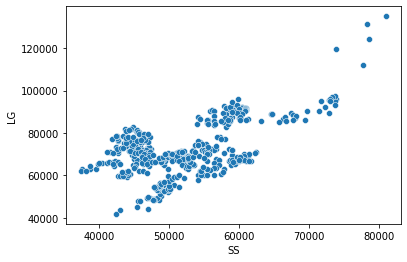

In [ ]:
import seaborn as sns

sns.scatterplot(temp.SS, temp.LG, legend = "auto")

In [ ]:
from scipy import stats
reg = stats.linregress(temp.SS, temp.LG)
print(type(reg))
print(reg)
## reg --> keyworkd dict(**) key값으로 꺼내기 

<class 'scipy.stats._stats_mstats_common.LinregressResult'>
LinregressResult(slope=0.9480898106012625, intercept=22915.262833912013, rvalue=0.595366725556041, pvalue=1.0476300600213807e-48, stderr=0.05768241445139649)


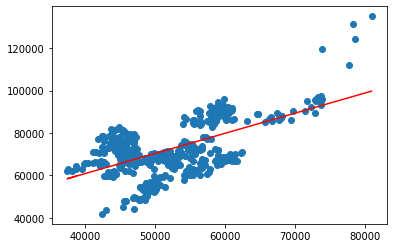

In [ ]:
# y = ax + b 가설함수

# x = 1
# hx = reg.slope* x + reg.intercept
# print(hx)


plt.scatter(temp.SS, temp.LG)
plt.plot(temp.SS, reg.intercept + reg.slope*temp.SS, 'r', label='fitted line')
plt.show()


## LSTM을 이용한 삼성전자 주가 예측

In [ ]:
from pykrx import stock as krx

df = krx.get_market_ohlcv_by_date('20100101','20201230','005930')
df.fillna(method='ffill', inplace= True)

In [ ]:
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2714 entries, 2010-01-04 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   시가      2714 non-null   int32
 1   고가      2714 non-null   int32
 2   저가      2714 non-null   int32
 3   종가      2714 non-null   int32
 4   거래량     2714 non-null   int32
dtypes: int32(5)
memory usage: 74.2 KB


In [ ]:
# 날짜모양의 글자다 '2019-01-01'(str) --> date타입
# df['날짜'] =pd.to_datetime(df['날짜'], format ="%Y-%m-%d")
# df.set_index('날짜')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


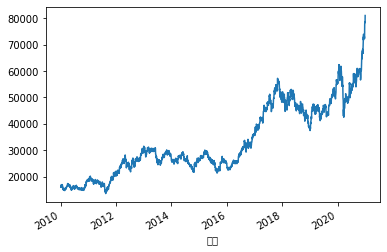

In [ ]:
df['종가'].plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


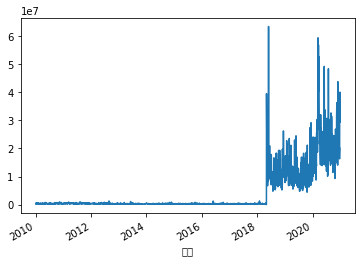

In [ ]:
df['거래량'].plot()

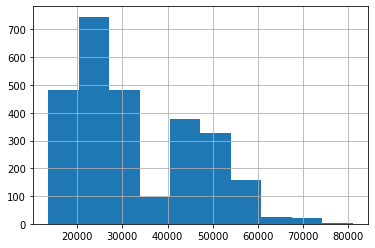

In [ ]:
df['종가'].hist()

### 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
sdf = pd.DataFrame(df_scaler, columns = df.columns, index=df.index)


In [ ]:
sdf.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2010-01-04,0.203291,0.199016,0.204604,0.038279,0.003769
2010-01-05,0.209114,0.203936,0.208440,0.042136,0.008808
2010-01-06,0.209873,0.206888,0.211253,0.047774,0.007241
2010-01-07,0.212911,0.206888,0.207928,0.039466,0.006981
2010-01-08,0.207595,0.201968,0.206138,0.041840,0.004659


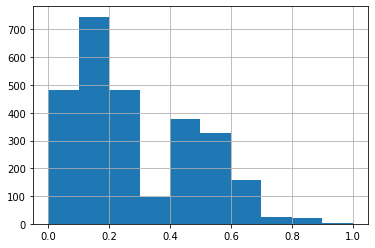

In [ ]:
sdf['종가'].hist()

In [ ]:
# np.log1p(df['종가']).hist()

#### train, test 분할

In [ ]:
train_size = 0.8
split_idx =int(sdf.shape[0]*train_size)

train = sdf.iloc[:split_idx]
test = sdf.iloc[split_idx:]

In [ ]:
print(train.shape, test.shape)

(2171, 5) (543, 5)


In [ ]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2714 entries, 2010-01-04 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      2714 non-null   float64
 1   고가      2714 non-null   float64
 2   저가      2714 non-null   float64
 3   종가      2714 non-null   float64
 4   거래량     2714 non-null   float64
dtypes: float64(5)
memory usage: 127.2 KB


In [ ]:
def make_dataset(data, label, window_size=20): #Rolling
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)

In [ ]:
y_train = train["종가"]
X_train = train.drop("종가", axis=1)
y_test = test["종가"]
X_test = test.drop("종가", axis=1)

train_feature, train_label = make_dataset(X_train,y_train)
test_feature, test_label =make_dataset(X_test, y_test)

In [ ]:
print(train_feature.shape, train_label.shape)
print(test_feature.shape, test_label.shape)

(2151, 20, 4) (2151,)
(523, 20, 4) (523,)


In [ ]:
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
model = Sequential()
# model.add(Input())
model.add(LSTM(20, activation='relu',return_sequences= True, input_shape = (train_feature.shape[1], train_feature.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss= 'mse', metrics=['mse'])

#callbacks
estop = EarlyStopping(monitor = 'val_loss', patience=4)

#모델 적용(fit)
res = model.fit(train_feature,train_label,callbacks=[estop], epochs= 100, validation_split = 0.1)

Epoch 1/100
61/61 [==============================] - 2s 11ms/step - loss: 0.0915 - mse: 0.0915 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 2/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 4/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0342 - val_mse: 0.0342
Epoch 5/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0308 - val_mse: 0.0308
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0267 - val_mse: 0.0267
Epoch 7/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 8/100
61/61 [==============================] - 0s 7ms/step - loss: 0.0049 - 

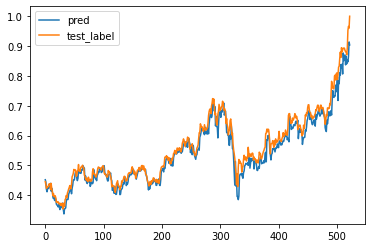

In [ ]:
# 모델 예측(predict)
pred= model.predict(test_feature)
# print(test_label[:5],pred[:5])
# plt.plot(pred.mean(axis=1), label='pred_mean')
plt.plot(pred[:,19,:], label='pred')
plt.plot(test_label, label='test_label')
plt.legend()
plt.show()


In [ ]:
# print(res.history.val_mse)

In [ ]:
from keras.metrics import mean_squared_error
mse = mean_squared_error(test_label,pred[:,19,:])
print(np.array(mse).mean())


0.026389727


In [ ]:
mse = mean_squared_error(test_label,pred.mean(axis=1))
print(np.array(mse).mean())


0.024292648
